**Tìm hiểu xem các yếu tố ảnh hưởng như nào đến các loại cây trồng**

In [1]:
# 1. THƯ VIỆN CẦN THIẾT
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Import TensorFlow and Keras for FCN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import random
from copy import deepcopy

In [2]:
df = pd.read_excel('Crop_recommendation.xlsx')

print(df.head())

df.info()

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
# Tạo cột 'Sum_NPK'
df['Sum_NPK'] = df[['N', 'P', 'K']].sum(axis=1)
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label  Sum_NPK
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice      175
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice      184
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice      159
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice      149
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice      162


In [4]:

def get_recommended_action(row):
    if row['N'] < 30 and row['K'] < 30: # Ví dụ: thiếu cả N và K
        return 'Add Fertilizer'
    if row['P'] < 20: # Ví dụ: thiếu P
        return 'Add Phosphorus'
    if row['rainfall'] < 100: # Lượng mưa thấp
        return 'Increase Watering'
    if row['humidity'] < 65: # Độ ẩm thấp
        return 'Provide More Humidity'
    if row['temperature'] > 35: # Nhiệt độ quá cao
        return 'Reduce Temperature' # Thêm một hành động mới
    if row['N'] > 80 and row['P'] > 50 and row['K'] > 50: # Mức dinh dưỡng tối ưu
        return 'Optimal Nutrient Levels'
    return 'No Specific Action' # Hành động mặc định

In [5]:
# Áp dụng các quy tắc để tạo cột hành động khuyến nghị
df['Recommended_Action'] = df.apply(get_recommended_action, axis=1)

# Mã hóa biến mục tiêu 'Recommended_Action' thành số
label_encoder = LabelEncoder()
df['Recommended_Action_Encoded'] = label_encoder.fit_transform(df['Recommended_Action'])

# Định nghĩa features (X) và target (y)
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Sum_NPK']]
y = df['Recommended_Action_Encoded']

# Chuẩn hóa đặc trưng toàn bộ dữ liệu trước khi thêm nhiễu và chia
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def inject_label_noise(y_labels, noise_level=0.1):
    """
    Injects random noise into labels to simulate real-world imperfections.
    """
    y_noisy = deepcopy(y_labels)
    classes = list(set(y_labels))
    for i in range(len(y_noisy)):
        if random.random() < noise_level:
            # Randomly choose a different class for the noisy label
            y_noisy[i] = random.choice([cls for cls in classes if cls != y_noisy[i]])
    return y_noisy

# Inject noise into the target labels
y_noisy = inject_label_noise(y, noise_level=0.1)

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra (sử dụng y_noisy)
# stratify=y_noisy giúp đảm bảo tỷ lệ các lớp trong y_train và y_test tương tự nhau
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X_scaled, y_noisy, test_size=0.2, random_state=42, stratify=y_noisy
)

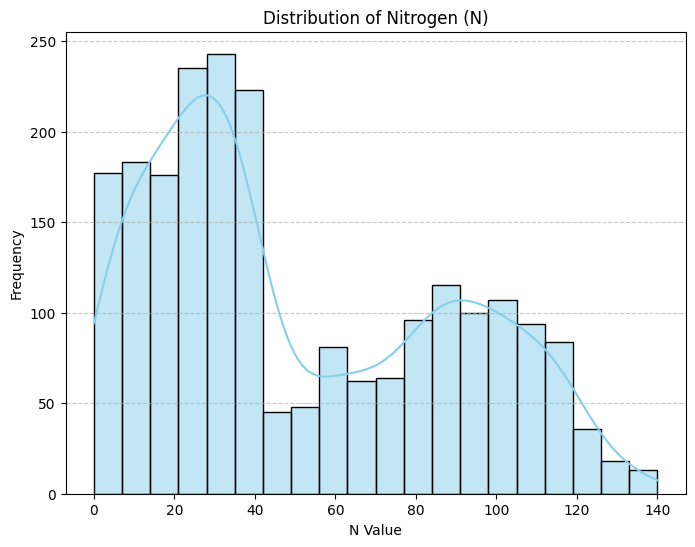

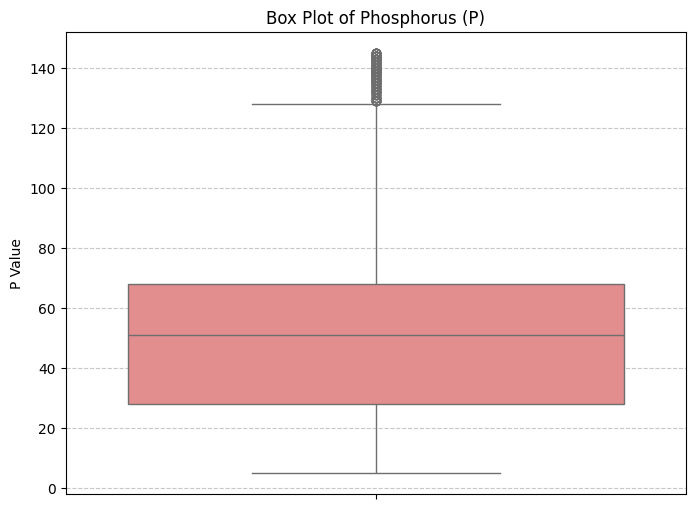

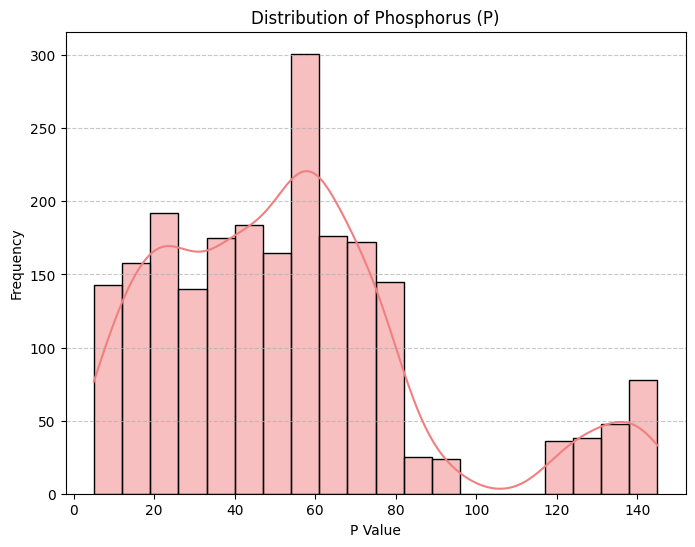

<Figure size 1500x1500 with 0 Axes>

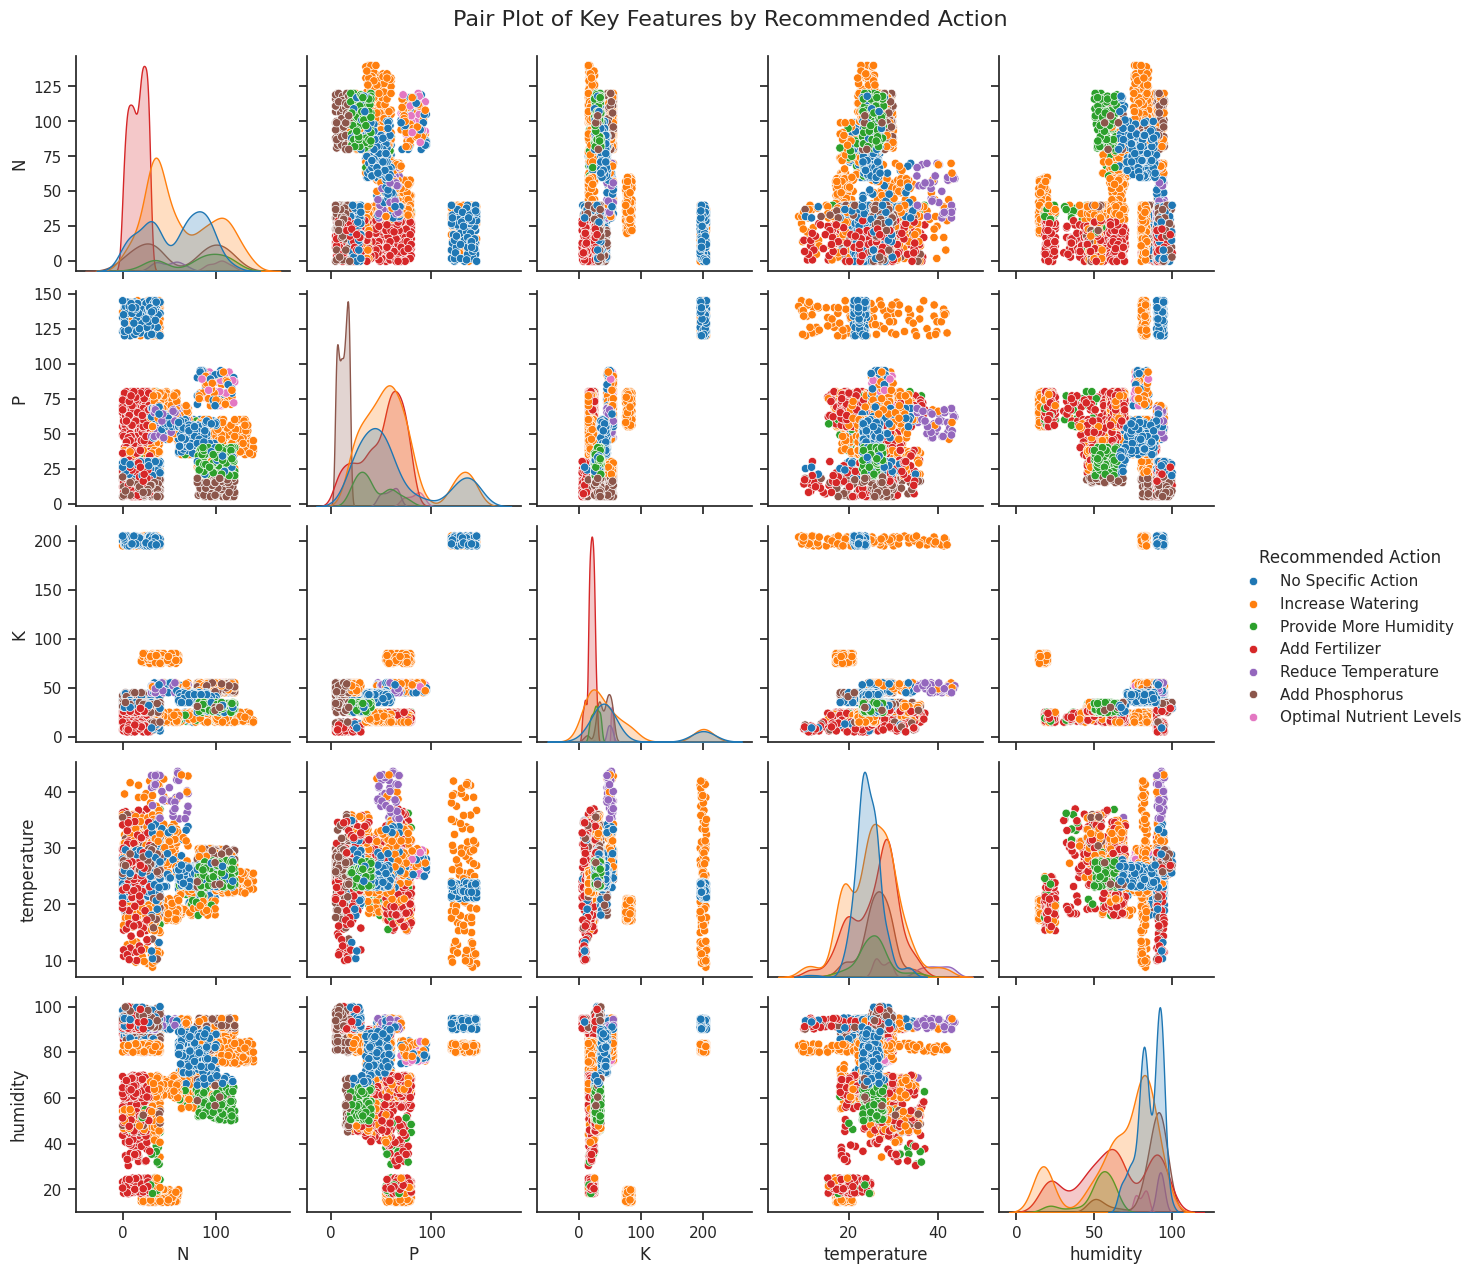

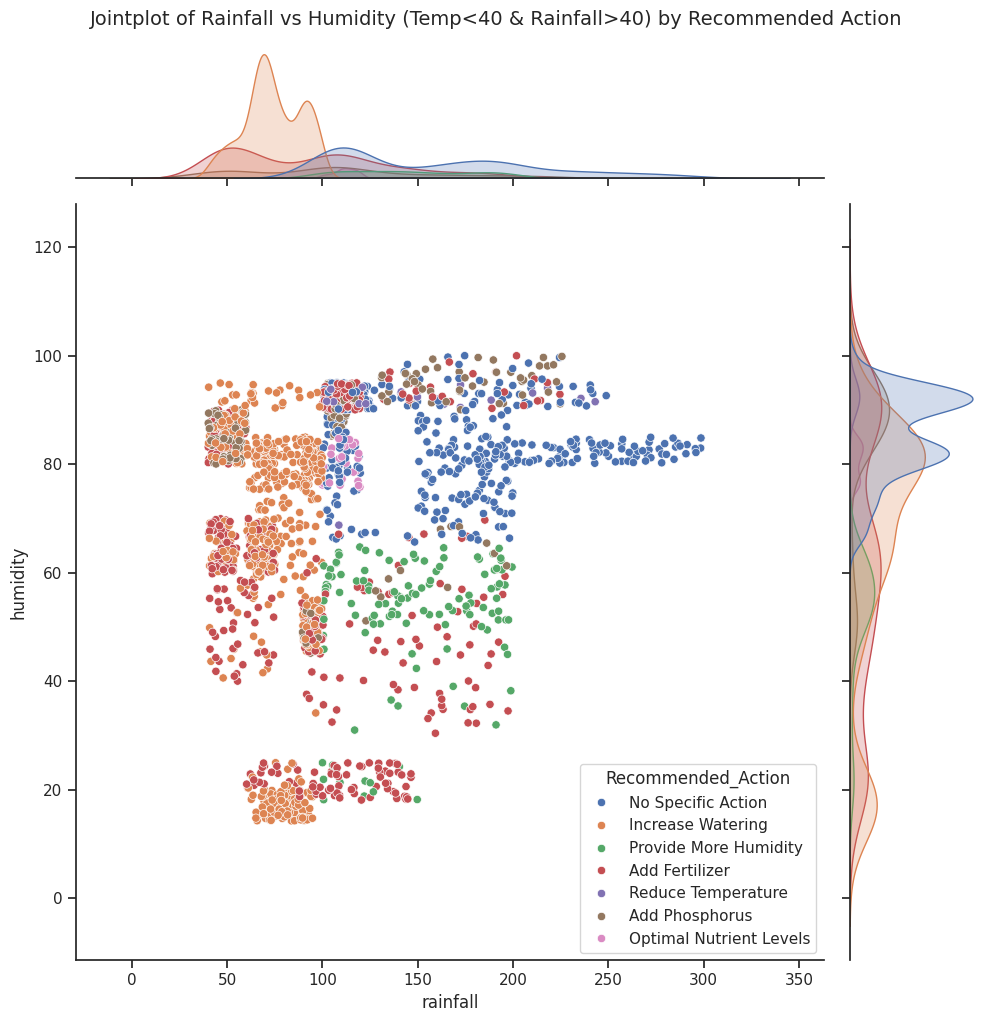

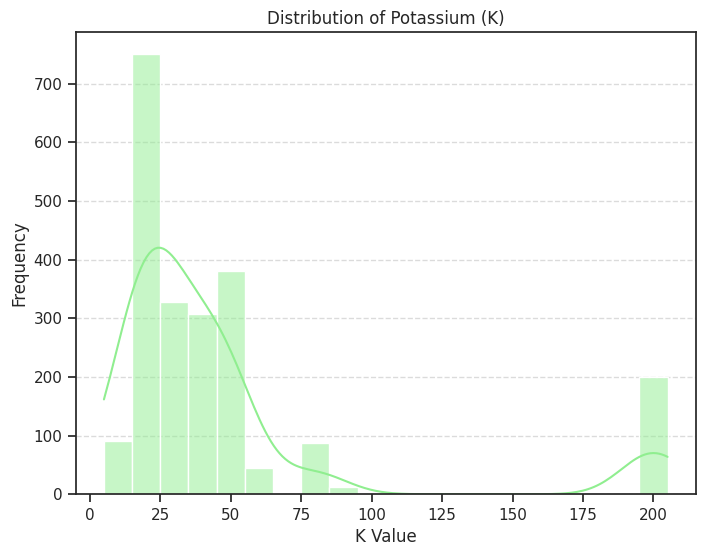


Correlation Heatmap của các đặc trưng số:


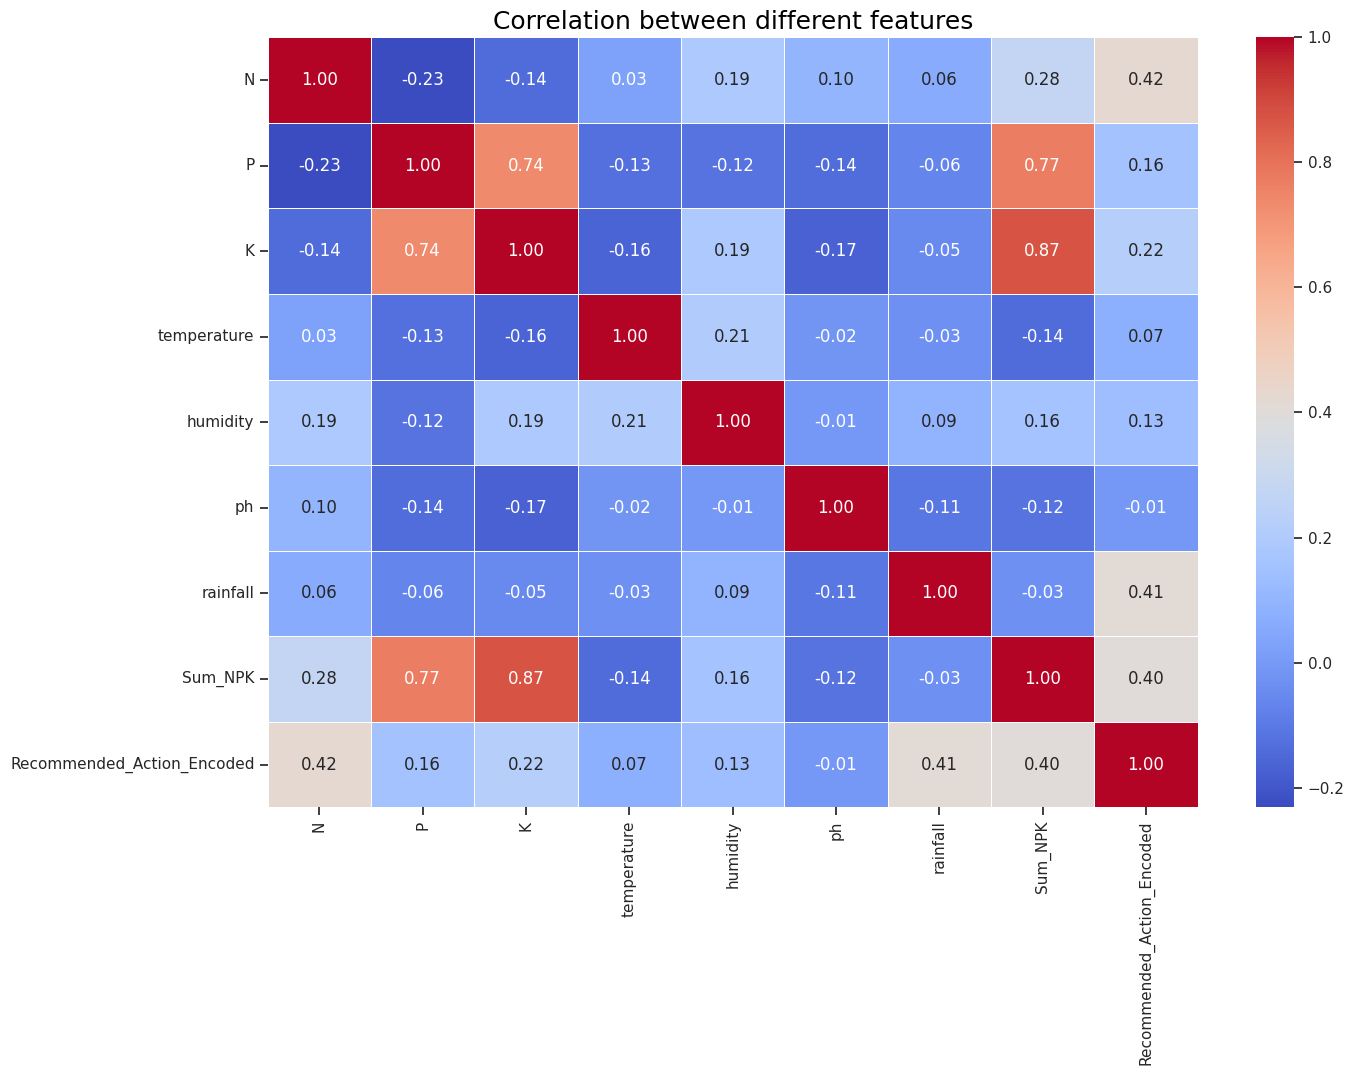

In [6]:
# --- Visualization (Giữ nguyên các phần trực quan hóa dữ liệu) ---
# 3.1. Histogram cho 'N'
plt.figure(figsize=(8, 6))
sns.histplot(df['N'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Nitrogen (N)')
plt.xlabel('N Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3.2. Box Plot cho 'P'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['P'], color='lightcoral')
plt.title('Box Plot of Phosphorus (P)')
plt.ylabel('P Value')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3.3. Histogram cho 'P'
plt.figure(figsize=(8, 6))
sns.histplot(df['P'], bins=20, kde=True, color='lightcoral')
plt.title('Distribution of Phosphorus (P)')
plt.xlabel('P Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3.4. Pair Plot cho các đặc trưng chính
sns.set(style="ticks")
# Sử dụng một bản sao của DataFrame để tránh SettingWithCopyWarning nếu có
df_for_pairplot = df[['N', 'P', 'K', 'temperature', 'humidity', 'Recommended_Action']].copy()
df_for_pairplot.rename(columns={'Recommended_Action': 'Recommended Action'}, inplace=True)

plt.figure(figsize=(15, 15)) # Tăng kích thước tổng thể của pairplot
sns.pairplot(df_for_pairplot, kind='scatter', hue='Recommended Action', palette='tab10', diag_kind='kde') # diag_kind='kde' cho mật độ ở đường chéo
plt.suptitle('Pair Plot of Key Features by Recommended Action', y=1.02, fontsize=16) # Đặt tiêu đề chung
plt.show()

# 3.5. Jointplot Rainfall vs Humidity (với điều kiện lọc)
# The original code used 'label' which was not defined in the context of 'Recommended_Action'.
# This has been updated to use 'Recommended_Action' for consistency with the new target variable.
jp = sns.jointplot(x="rainfall", y="humidity", data=df[(df['temperature'] < 40) &
                                                       (df['rainfall'] > 40)], height=10, hue="Recommended_Action")
jp.fig.suptitle('Jointplot of Rainfall vs Humidity (Temp<40 & Rainfall>40) by Recommended Action', y=1.02, fontsize=14)
plt.show()

# 3.6. Histogram cho 'K'
plt.figure(figsize=(8, 6))
sns.histplot(df['K'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Potassium (K)')
plt.xlabel('K Value')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 3.7. Correlation Heatmap
print("\nCorrelation Heatmap của các đặc trưng số:")
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation between different features', fontsize=18, color='black')
plt.show()


Bắt đầu huấn luyện Fully Connected Network (FCN)...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,863 (38.53 KB)

 Trainable params: 9,863 (38.53 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4669 - loss: 1.6558 - val_accuracy: 0.5426 - val_loss: 1.3510
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6466 - loss: 1.1350 - val_accuracy: 0.6250 - val_loss: 1.1516
Epoch 3/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6962 - loss: 0.9707 - val_accuracy: 0.6562 - val_loss: 1.0561
Epoch 4/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7018 - loss: 0.9452 - val_accuracy: 0.6761 - val_loss: 1.0230
Epoch 5/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7240 - loss: 0.9085 - val_accuracy: 0.6932 - val_loss: 1.0071
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7156 - loss: 0.8762 - val_accuracy: 0.7045 - val_loss: 0.9702
Epoch 7/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7479 - loss: 0.8067 - val_accuracy: 0.7188 - val_loss: 0.9512
Epoch 8/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7462 - loss: 0.8433 - val_accuracy: 0.7216 - val_loss:

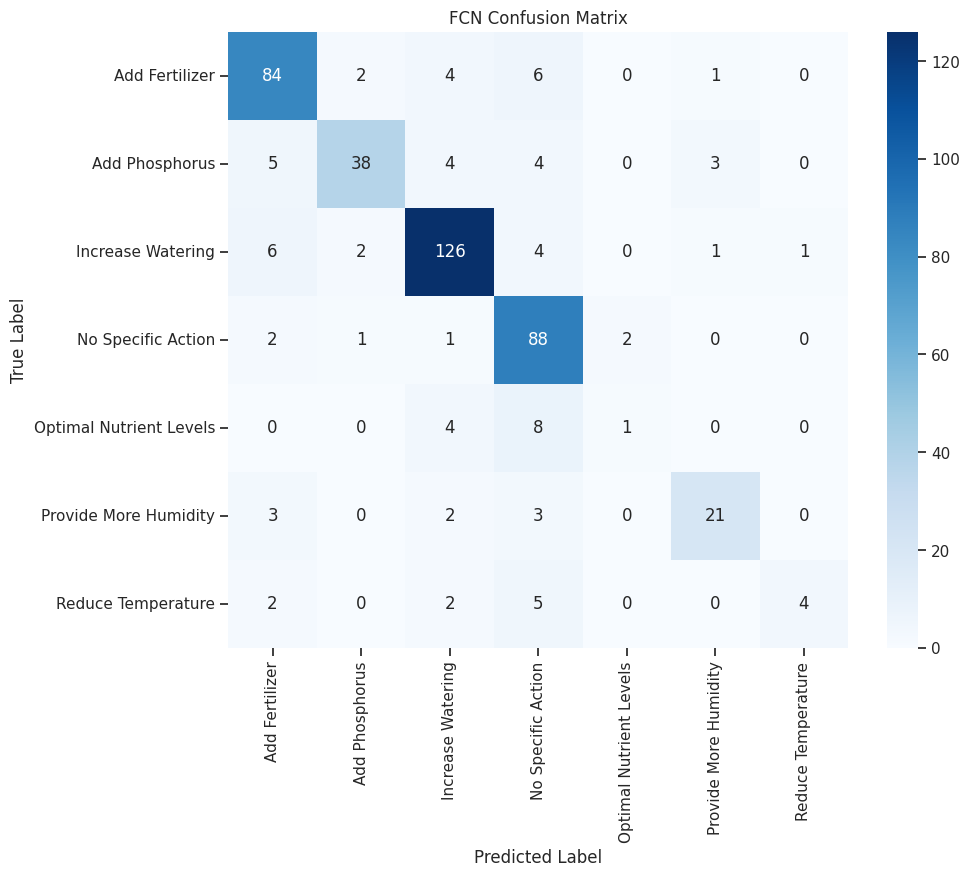

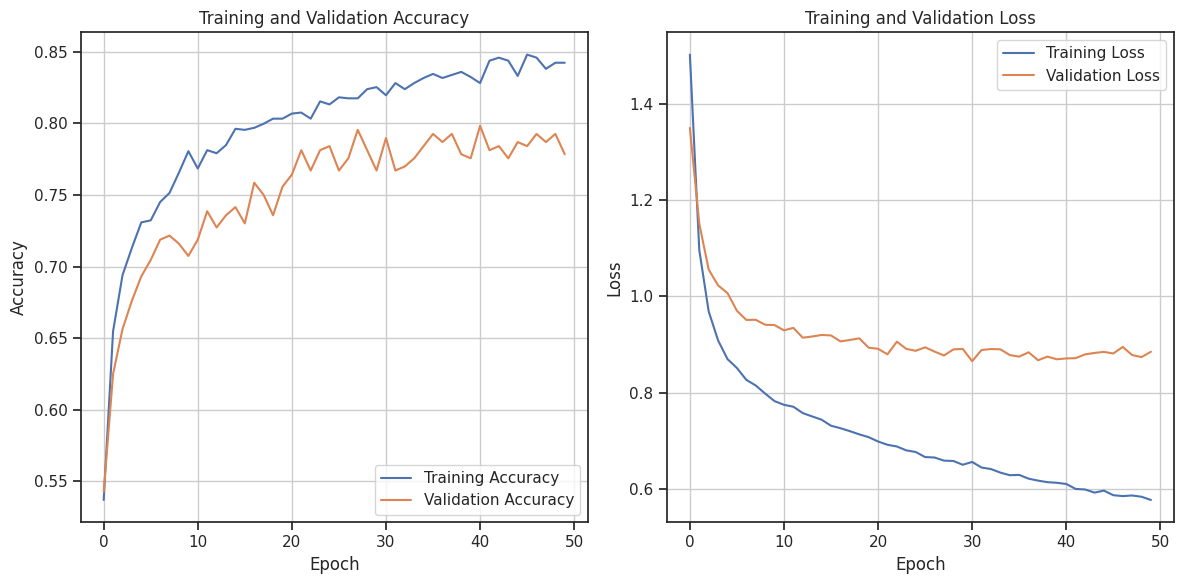


FCN training and evaluation complete.


In [7]:
# --- Fully Connected Network (FCN) Implementation ---
print("\nBắt đầu huấn luyện Fully Connected Network (FCN)...")

# Determine number of classes and input features for the FCN
num_classes = len(label_encoder.classes_)
input_shape = X_train_scaled.shape[1]
target_names_for_report = label_encoder.classes_

# Build the FCN model using Keras Sequential API
fcn_model = Sequential([
    # First hidden layer with 128 neurons and ReLU activation.
    # input_shape specifies the number of features in the input data.
    Dense(128, activation='relu', input_shape=(input_shape,)),
    # Second hidden layer with 64 neurons and ReLU activation.
    Dense(64, activation='relu'),
    # Output layer with 'num_classes' neurons and softmax activation.
    # Softmax is used for multi-class classification to output probabilities for each class.
    Dense(num_classes, activation='softmax')
])

# Compile the model
# Optimizer: 'adam' is a popular choice for its efficiency.
# Loss function: 'sparse_categorical_crossentropy' is used because our target labels (y_train, y_test)
# are integer-encoded (e.g., 0, 1, 2...) rather than one-hot encoded.
# Metrics: 'accuracy' to monitor the classification accuracy during training and evaluation.
fcn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Print a summary of the model architecture
fcn_model.summary()

# Train the FCN model
# epochs: Number of times the model will iterate over the entire training dataset.
# batch_size: Number of samples per gradient update.
# validation_split: Fraction of the training data to be used as validation data.
# verbose: Set to 1 to display progress bar during training.
history = fcn_model.fit(X_train_scaled, y_train,
                        epochs=50,
                        batch_size=32,
                        validation_split=0.2,
                        verbose=1)

# Evaluate the model on the test set
loss, accuracy = fcn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"\nFCN Test Loss: {loss:.4f}")
print(f"FCN Test Accuracy: {accuracy:.4f}")

# Make predictions on the test set
# The predict method returns probabilities for each class.
y_pred_proba_fcn = fcn_model.predict(X_test_scaled)
# Convert probabilities to class labels by selecting the class with the highest probability.
y_pred_fcn = np.argmax(y_pred_proba_fcn, axis=1)

# Generate and print the Classification Report
# This report shows precision, recall, f1-score, and support for each class.
print("\nFCN Classification Report:")
print(classification_report(y_test, y_pred_fcn, target_names=target_names_for_report))

# Generate and visualize the Confusion Matrix
# A confusion matrix shows the number of correct and incorrect predictions made by the classification model
# compared to the actual outcomes (target values).
cm_fcn = confusion_matrix(y_test, y_pred_fcn)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_fcn, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names_for_report, yticklabels=target_names_for_report)
plt.title('FCN Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Thêm biểu đồ Accuracy và Loss ---
# Lấy dữ liệu accuracy và loss từ đối tượng history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

# Biểu đồ Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1) # 1 hàng, 2 cột, biểu đồ thứ nhất
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

# Biểu đồ Loss
plt.subplot(1, 2, 2) # 1 hàng, 2 cột, biểu đồ thứ hai
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout() # Đảm bảo các biểu đồ không bị chồng lên nhau
plt.show()

print("\nFCN training and evaluation complete.")